In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from pathlib import Path

# Loading the images and Preprocessing

In [2]:
image_data = []
labels = []

p = Path("C:/Users/jaiga/Desktop/ml_datasets/animal_faces/afhq/train/")
dirs = p.glob("*")
label_index = 0
outputs = {}
count = 0
for folder_dir in dirs:
    print(folder_dir)
    cur_sign = str(folder_dir).split("\\")[-1]
    outputs[label_index] = cur_sign
    for img_path in folder_dir.glob("*.jpg"):
        if(count % 1 == 0):
            file_name = str(img_path).split("\\")[-1]
            img = image.load_img(img_path, target_size = (150,150))
            image_array = image.img_to_array(img)
            #image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
            image_data.append(image_array)
            labels.append(label_index)
        count += 1
    label_index = label_index + 1
    
print(count, count//1)
print(label_index)   

C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\train\cat
C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\train\dog
C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\train\wild
14630 14630
3


In [3]:
print(outputs)

{0: 'cat', 1: 'dog', 2: 'wild'}


In [4]:
print(labels)
image_data = np.array(image_data)
labels = np.array(labels)
print(image_data.shape, labels.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

(14630, 150, 150, 3) (14630,)


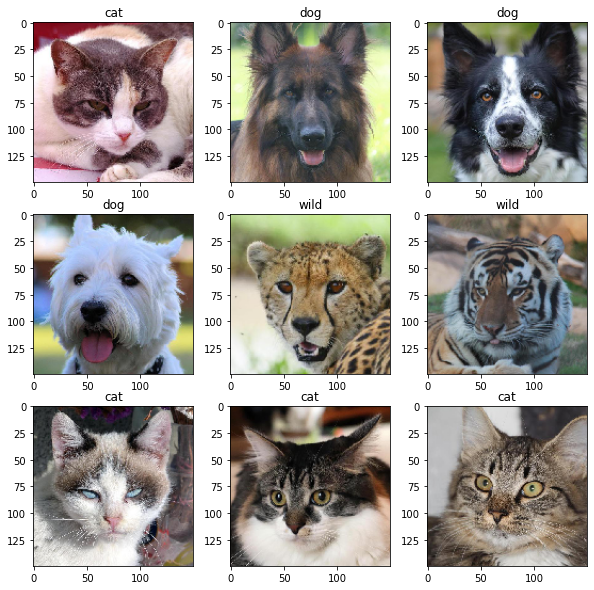

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
    r = np.random.randint(len(labels))
    plt.subplot(3,3,i+1)
    plt.imshow(image_data[r]/255.0)
    plt.title(f"{outputs[labels[r]]}")

# Visualizing the augmentation layer

In [6]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

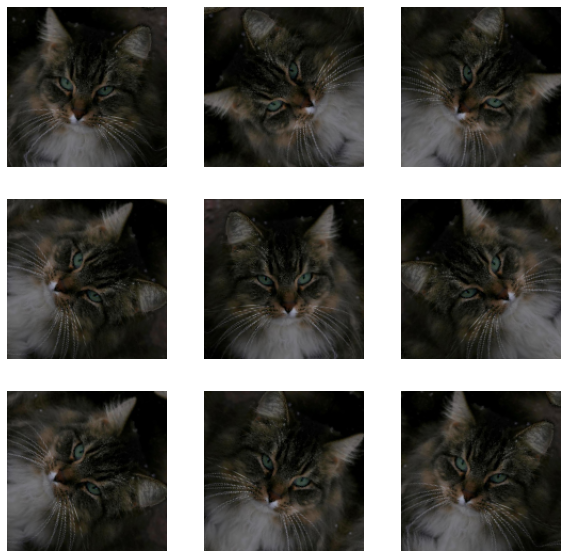

In [7]:
plt.figure(figsize=(10, 10))
first_image = image_data[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# Importing ResNet50 and Freezing it

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [9]:
base_model = ResNet50(input_shape=(150,150,3), weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [10]:
inputs = tf.keras.Input(shape=(150,150,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 150, 150, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [12]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
X = image_data
Y = labels
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

# Initial ImageNet Accuracy without training

In [14]:
loss0, accuracy0 = model.evaluate(X_val, Y_val)

92/92 [==============================] - 81s 856ms/step - loss: 1.0839 - accuracy: 0.5178


In [17]:
initial_epochs = 5
history = model.fit(X_train, Y_train, epochs = initial_epochs, validation_data = (X_val, Y_val))

Epoch 1/5
366/366 [==============================] - 402s 1s/step - loss: 0.2801 - accuracy: 0.8971 - val_loss: 0.0441 - val_accuracy: 0.9918
Epoch 2/5
366/366 [==============================] - 393s 1s/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0263 - val_accuracy: 0.9949
Epoch 3/5
366/366 [==============================] - 400s 1s/step - loss: 0.0554 - accuracy: 0.9815 - val_loss: 0.0205 - val_accuracy: 0.9952
Epoch 4/5
366/366 [==============================] - 394s 1s/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0172 - val_accuracy: 0.9962
Epoch 5/5
366/366 [==============================] - 396s 1s/step - loss: 0.0385 - accuracy: 0.9872 - val_loss: 0.0163 - val_accuracy: 0.9969


# Visualizing Acc with freezed ResNet transfer learning

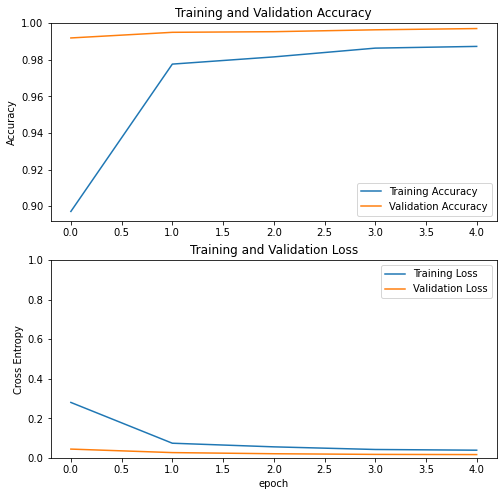

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Unfreezing the layers of ResNet50 for fine-tuning and training

In [19]:
base_model.trainable = True

In [20]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [21]:
fine_tune_at = 120
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 150, 150, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 150, 150, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [29]:
fine_tune_epochs = 2
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train,Y_train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(X_val, Y_val))

Epoch 5/7
366/366 [==============================] - 777s 2s/step - loss: 0.0298 - accuracy: 0.9890 - val_loss: 0.0078 - val_accuracy: 0.9973
Epoch 6/7
366/366 [==============================] - 778s 2s/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0100 - val_accuracy: 0.9962
Epoch 7/7
366/366 [==============================] - 797s 2s/step - loss: 0.0133 - accuracy: 0.9951 - val_loss: 0.0057 - val_accuracy: 0.9976


# Visualizing accuracy after Fine-Tuning and Optimization

In [30]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

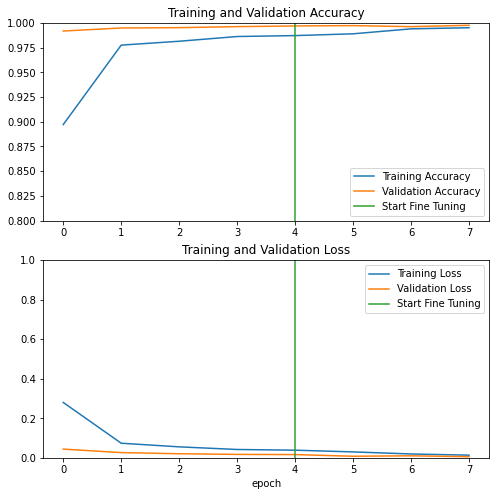

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Importing Test Data

In [33]:
test_image_data = []
test_labels = []

p = Path("C:/Users/jaiga/Desktop/ml_datasets/animal_faces/afhq/val/")
dirs = p.glob("*")
label_index = 0
outputs = {}
count = 0
for folder_dir in dirs:
    print(folder_dir)
    cur_sign = str(folder_dir).split("\\")[-1]
    outputs[label_index] = cur_sign
    for img_path in folder_dir.glob("*.jpg"):
        if(count % 1 == 0):
            file_name = str(img_path).split("\\")[-1]
            img = image.load_img(img_path, target_size = (150,150))
            image_array = image.img_to_array(img)
            #image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
            test_image_data.append(image_array)
            test_labels.append(label_index)
        count += 1
    label_index = label_index + 1
    
print(count, count//1)
print(label_index)

C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\val\cat
C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\val\dog
C:\Users\jaiga\Desktop\ml_datasets\animal_faces\afhq\val\wild
1500 1500
3


In [34]:
X_test = np.array(test_image_data)
Y_test = np.array(test_labels)
print(X_test.shape, Y_test.shape)

(1500, 150, 150, 3) (1500,)


In [35]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

47/47 [==============================] - 42s 884ms/step - loss: 0.0080 - accuracy: 0.9973


In [36]:
preds = model.predict(X_test)
print(preds)

47/47 [==============================] - 44s 913ms/step
[[1.0000000e+00 3.1858916e-10 1.3731636e-12]
 [1.0000000e+00 4.1814377e-10 6.2263056e-11]
 [9.9999988e-01 6.4562769e-08 3.9894953e-08]
 ...
 [1.0454245e-07 1.1577121e-06 9.9999869e-01]
 [4.7389309e-10 1.1088788e-08 1.0000000e+00]
 [2.2235684e-08 6.5355340e-07 9.9999928e-01]]


In [40]:
pred_classes = np.argmax(preds,axis=1)
print(pred_classes)

[0 0 0 ... 2 2 2]


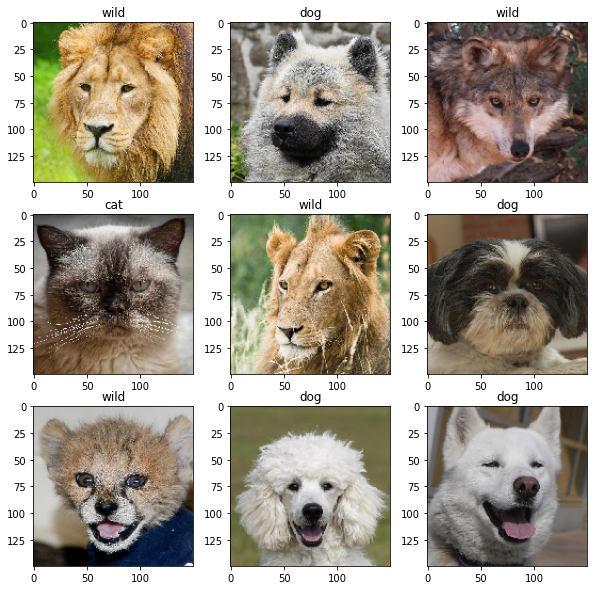

In [41]:
plt.figure(figsize=(10, 10))
for i in range(9):
    r = np.random.randint(len(pred_classes))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[r]/255.0)
    plt.title(f"{outputs[pred_classes[r]]}")

# Evaluating the Performance of Model

In [42]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(pred_classes, Y_test)

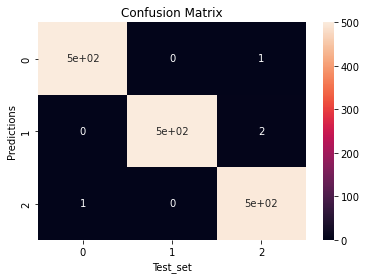

In [43]:
import seaborn
cnf_df = pd.DataFrame(cnf_matrix, range(3), range(3))
seaborn.heatmap(cnf_df, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Test_set")
plt.ylabel("Predictions")
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(pred_classes, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       502
           2       0.99      1.00      1.00       498

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

